In [1]:
#ISupport Vector Machine 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 

from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV #search for the optimal c and gamma values 



from sklearn.model_selection import train_test_split


from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve   #expand on this in the write up 


In [30]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

In [2]:
dataset=pd.read_csv('telemonitoring_parkinsons_updrs.data.csv')
dataset

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


<AxesSubplot:>

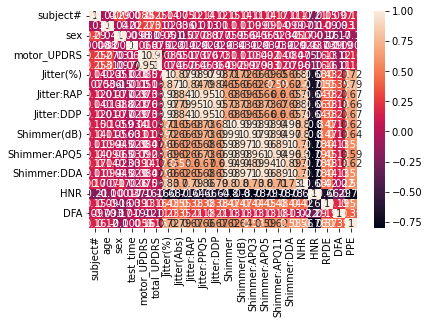

In [3]:
sns.heatmap(dataset.corr( ), annot=True)

In [4]:
dataset.drop(dataset.columns[0], axis=1) #subject# is not a useful feature in this case 


,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [5]:
dataset.drop(dataset.columns[4], axis=1) #

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [6]:
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [7]:
y=dataset['total_UPDRS']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(X_train)

StandardScaler()

In [12]:
#standardize training data
X_train_std = sc.transform(X_train)

In [13]:
X_test_std = sc.transform(X_test)

In [14]:
X_test_std

array([[ 1.56638181,  0.35745305,  1.45347266, ...,  0.10654841,
         0.65433521,  0.34236736],
       [ 1.08416036,  0.69933936, -0.68800744, ...,  1.03217561,
         1.35448669,  2.09798914],
       [ 0.11971746, -0.66820588,  1.45347266, ..., -0.37688437,
         0.55760283, -0.48973219],
       ...,
       [ 1.56638181,  0.35745305,  1.45347266, ...,  1.28447486,
        -0.04104284,  0.85186293],
       [-1.24657665, -0.21235747, -0.68800744, ...,  0.08110981,
        -0.87695661,  0.46320715],
       [ 0.11971746, -0.66820588,  1.45347266, ...,  0.38418689,
         0.68227388,  0.30398295]])

In [15]:
svr = SVR(kernel='rbf',gamma=0.09, C=1.5)

In [16]:
svr.fit(X_train_std,y_train)

SVR(C=1.5, gamma=0.09)

In [17]:
y_test_pred = svr.predict(X_test_std)
y_train_pred = svr.predict(X_train_std)

In [18]:
y_test_pred

array([38.74912398, 37.36599318, 19.7028304 , ..., 42.37923531,
       36.28833531, 18.7521196 ])

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
#error of the test data

mean_squared_error(y_test,y_test_pred)

6.291922268479804

In [28]:
#training score 
r2_score(y_train,y_train_pred)*100

95.9286498049023

In [29]:
#testing score
r2_score(y_test,y_test_pred)*100

94.355205276661

In [31]:
mean_squared_error(y_train, y_train_pred)

4.6914037788430045

In [23]:
predicted_value=y_test_pred
true_value=y_test

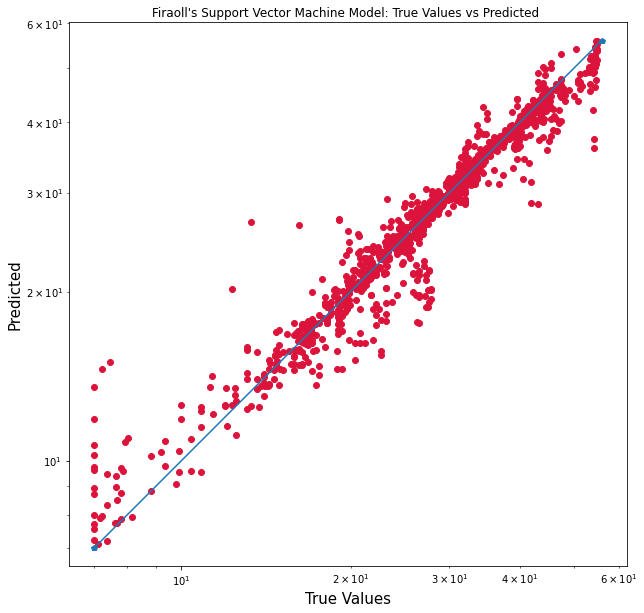

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'p-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Firaoll's Support Vector Machine Model: True Values vs Predicted ")
plt.axis('equal')
plt.show()

In [34]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

# y_predicted_train = svr.predict(X_train)
# y_predicted_test = svr.predict(X_test)

accuracy_train = r2_score(y_train, y_train_pred)
print("Training Accuracy for Boosted ", accuracy_train*100)

accuracy_test = r2_score(y_test, y_test_pred)
print("Testing Accuracy for Boosted: ", accuracy_test*100)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Boosted  95.9286498049023
Testing Accuracy for Boosted:  94.355205276661
RMSE for Training Data:  2.165964860943733
RMSE for Testing Data:  2.5083704408399896
